# Welcome to my solution to the first question for the 2021 Fall Shopify Data Science Intern Challenge!
### My name is Sergei Issaev. I am a Masters student at the University of British Columbia, and I am very interested in joining the Shopify team this Fall for an internship opportunity. Without further ado, let's get started!
### Here is the first question

Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

What metric would you report for this dataset?

What is its value?


### Initial Thoughts

Awesome. Interesting problem - there is an issue with the calculation, and I'd like to investigate what the problem is. A great place to start would be to replicate their calculation of $3145.3. That way, I am on the same page as whoever asked the question, and the investigation can continue from there.

I will start by loading in the data provided by Shopify at (https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0). I opened the link, downloaded as a .csv file, and that .csv file was pushed to the Github in which this notebook resides. I renamed the file to shopify_q1_data.csv, as the original name was too long. Let's load it now.

### Import Libraries

In [15]:
# Import pandas for data analysis
import pandas as pd
# Data visualization library
import matplotlib.pyplot as plt

### Load in Data

In [7]:
# Load the data in and visualize first 5 rows
df = pd.read_csv('shopify_q1_data.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
# I want to check for any NaN values before continuing
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [11]:
# Get the size and Dtype of the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1862 to 145
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 312.5+ KB


In [12]:
# Sort the dataframe to ensure we are only looking at 30 days of data, as specified in the question statement.
df = df.sort_values(by=['created_at'])
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25
...,...,...,...,...,...,...,...
2765,2766,9,708,236,2,debit,2017-03-30 9:22:41
4890,4891,63,853,136,1,cash,2017-03-30 9:27:00
244,245,32,928,202,2,cash,2017-03-30 9:30:28
211,212,22,712,292,2,credit_card,2017-03-30 9:40:40


### Thoughts

There are 5000 rows in the table, representing 5000 transactions using a shopify store. Looking at the created_by column, we can see the first purchase is on March 01, 2017, and the last purchase is on March 30, 2017. Good. Let's try to recreate the number $3145.13, as stated in the question.

In [25]:
# Get the mean and other statistical values for each column.
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


As we can see, by taking the mean of the order_amount column, we get 3145, which is truly a large number. As we can see by looking at the quantiles, the order_amount jumps by a very large amount between 75% and max. We can visualize this using a histogram.

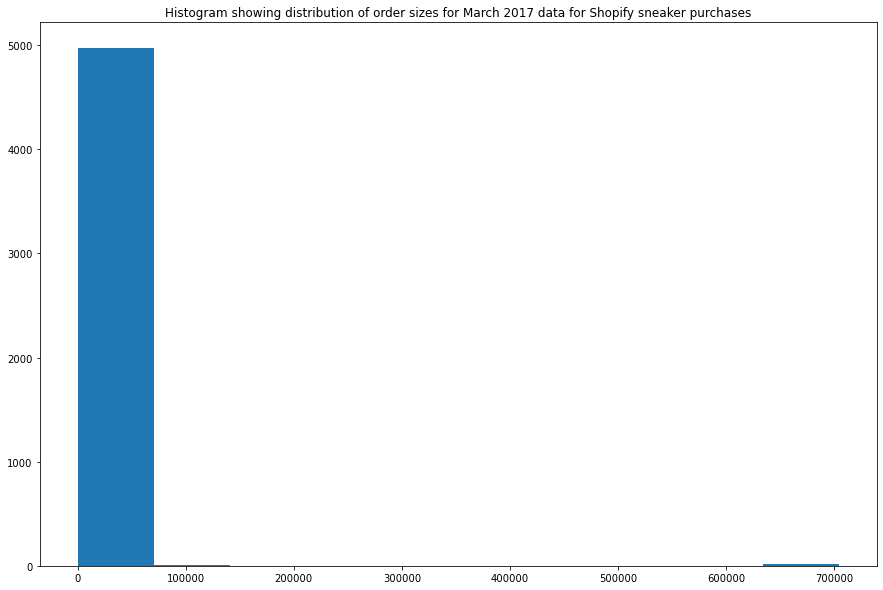

In [24]:
plt.figure(figsize=(15,10))
plt.hist(df['order_amount'])
plt.title("Histogram showing distribution of order sizes for March 2017 data for Shopify sneaker purchases")
plt.xlabel("Order size")
plt.ylabel('Amount of money spent on order sizes')
plt.show()

In [36]:
above_1000 = df[df["order_amount"] > 1000]
print('The number of orders having an order amount above $1000 is ' + str(above_1000.shape[0]))
above_1000.head(10)

The number of orders having an order amount above 1000 is 71


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4311,4312,78,960,51450,2,debit,2017-03-01 3:02:10
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4412,4413,78,756,51450,2,debit,2017-03-02 4:13:39
2987,2988,42,819,1056,3,cash,2017-03-03 9:09:25
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44


There appear to be two types of large transactions. There is a sneaker that costs $25725 (perhaps Beyonce or Drake were buying sneakers?) There are also massive purchases of 2000 items that occurred multiple times (bulk orders). What is going wrong with the calculation is that since the mean is sensitive to outliers, the mean is raised by a large amount due to the small number of very expensive purchases. A better way to evaluate the data would be to analyze the median, which is the value separating the higher half from the lower half of a data sample. The median is less sensitive to outliers, since it simply chooses the number in the middle - half of the purchases cost less, half cost more, but it is unknown by much more or how much less the other orders tend to be, without looking at the standard deviation.

Therefore, I would report the median, which is the 50% quantile as seen in the df.describe() section. The result is a median order_amount of $284. This is a much more believable figure (in the context of what we are trying to understand). 

## Thank you for taking the time to look through my solution! I'm very excited to hear back from the Shopify team!
